# Create mosaics

This example notebook shows how you can easily create mosaics using the proposed method. 

The document is divided into 3 simple steps:
1. Import dependencies
2. Load images
3. Build the mosaic

## 1. Import dependencies

The main object to execute the proposed method with all its steps is `MosaicProcessor`. The rest of the dependencies are only necessary to load sample images and display them.

In [1]:
from octa_mosaic import MosaicProcessor

# For load and show images
from octa_mosaic.experiments.constants import DATASET_PATH
from octa_mosaic.experiments.data import Dataset
from octa_mosaic.experiments.utils import plots

## 2. Load images

For this example, we are going to load a set of images from the [OCTA-Mosaicking Dataset](https://zenodo.org/records/14333858). However, you can load your set of images!

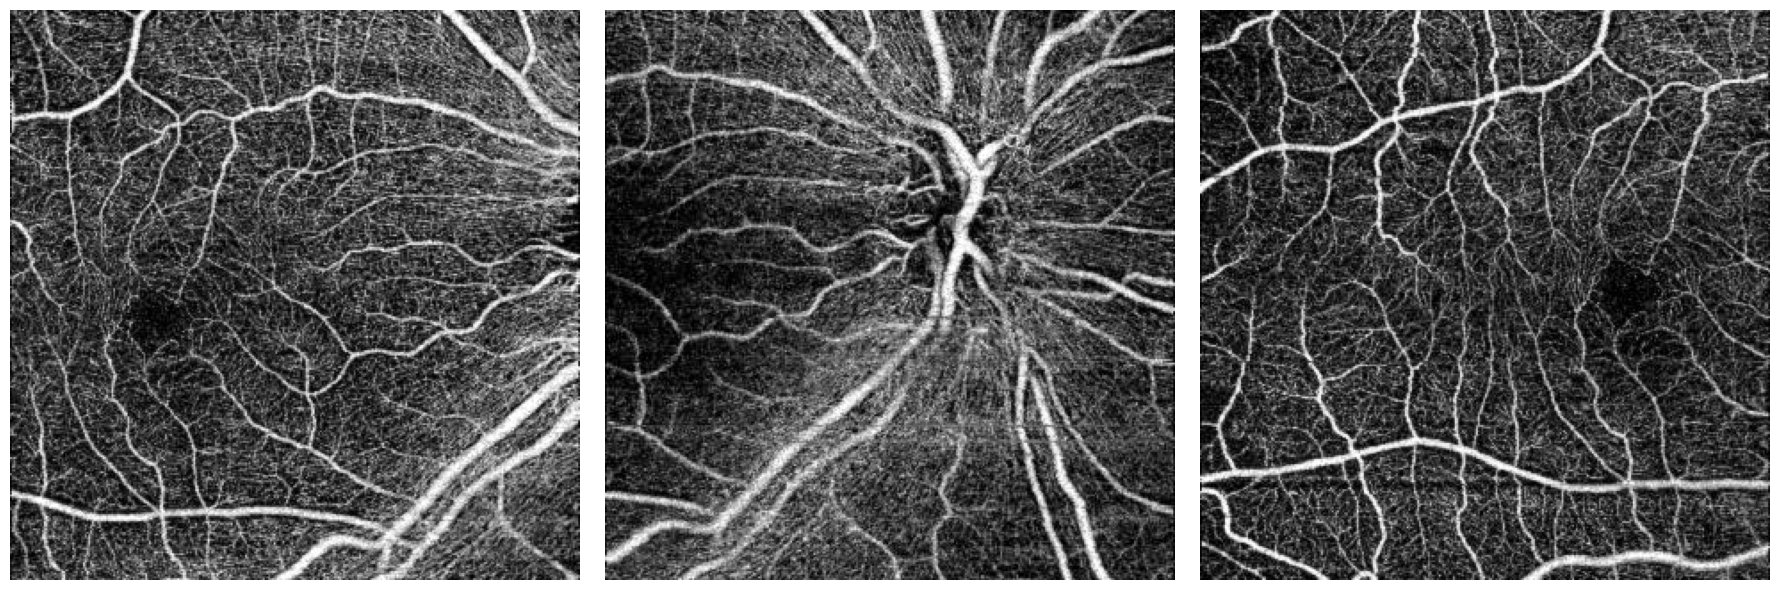

In [2]:
dataset = Dataset(DATASET_PATH)
sample_images = dataset.get_cases()[0].get_images()

# Visualize
plots.plot_mult(sample_images, cols=len(sample_images))

As you can see, our example consists of 3 images that we are going to combine to build our mosaic.

## 3. Build mosaic

Building the mosaic is as simple as creating a `MosaicProcessor` instance and calling the `run` method and passing the list of images.

Current fitness value: 0.5104.: 100%|██████████| 100/100 [04:57<00:00,  2.97s/it]


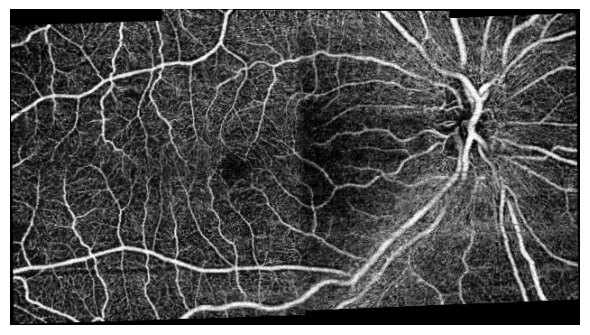

In [3]:
mosaic_processor = MosaicProcessor()
mosaic = mosaic_processor.run(sample_images)

plots.plot_mult([mosaic])

You can also perform each of the steps individually to observe the partial results. To do this, you must execute the following methods:
1. `build_initial_mosaic`: builds a first version of the mosaic using template-matching.
1. `optimize_mosaic`: optimizes the previous mosaic using differential evolution.
1. `blend_mosaic`: linearly combines the images to smooth the transitions between the images.

In [4]:
initial_mosaic = mosaic_processor.build_initial_mosaic(sample_images)
optimized_mosaic = mosaic_processor.optimize_mosaic(initial_mosaic)
blended_mosaic = mosaic_processor.blend_mosaic(optimized_mosaic)

Current fitness value: 0.5104.: 100%|██████████| 100/100 [04:44<00:00,  2.85s/it]


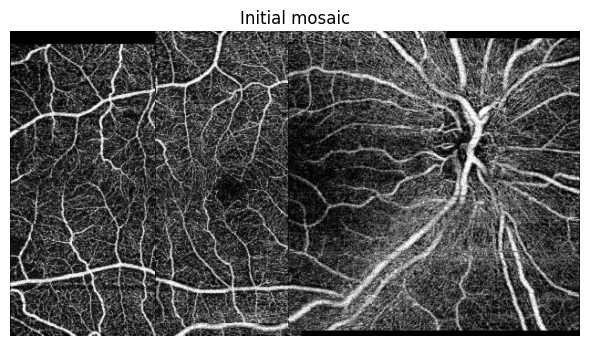

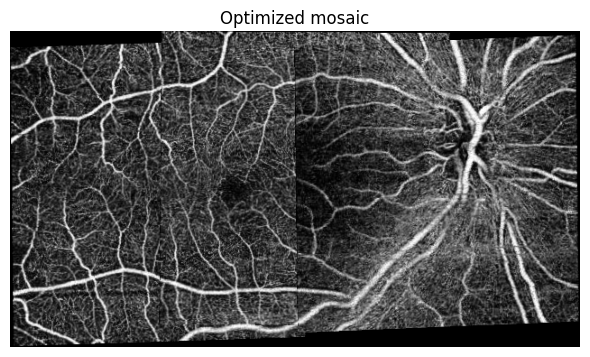

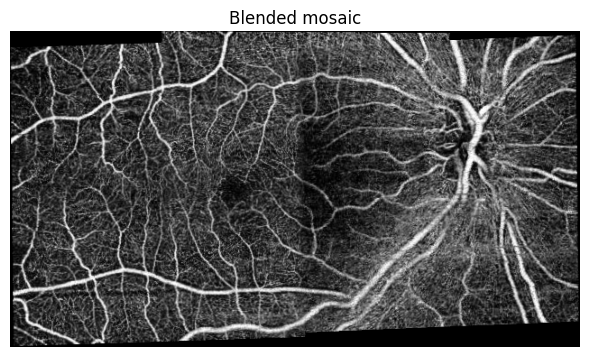

In [ ]:
# Plot images
mosaics = [initial_mosaic.image(), optimized_mosaic.image(), blended_mosaic]
labels = labels=["Initial mosaic", "Optimized mosaic", "Blended mosaic"]

# Plot inidividually to minimize space between images
for mosaic, label in zip(mosaics, labels):
    plots.plot_mult([mosaic], [label])  